In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('fullwidth.mplstyle')

C:\Users\steph\AppData\Local\Temp\ipykernel_18344\282159638.py:6: RuntimeWarning: invalid value encountered in divide
  return np.abs(2*sp.j1(arg)/arg)


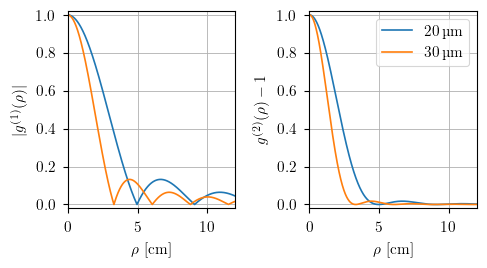

In [2]:
pinhole_diameters = [20e-6, 30e-6] #m
distance_to_observer = 1.75 #m
wavelength = 465e-9 #m
def g1_abs(d, pinhole_diameter):
    arg = np.pi*d*pinhole_diameter/(distance_to_observer*wavelength)
    return np.abs(2*sp.j1(arg)/arg)

fig,ax = plt.subplots(ncols=2, figsize=(5,2.81))
d = np.linspace(0,0.12,2000)
ax[0].plot(d*100, g1_abs(d, pinhole_diameters[0]), label='20 µm')
ax[0].plot(d*100, g1_abs(d, pinhole_diameters[1]), label='30 µm')
ax[0].grid()
ax[0].set(xlabel='$\\rho$ [cm]', ylabel='$|g^{(1)}(\\rho)|$',xlim=(0,12), ylim=(-0.02,1.02))
ax[1].plot(d*100, g1_abs(d, pinhole_diameters[0])**2, label='20$\,$µm')
ax[1].plot(d*100, g1_abs(d, pinhole_diameters[1])**2, label='30$\,$µm')
ax[1].grid()
ax[1].legend()
ax[1].set(xlabel='$\\rho$ [cm]', ylabel='$g^{(2)}(\\rho) -1$',xlim=(0,12), ylim=(-0.02,1.02))
fig.tight_layout()
fig.savefig('latex/images/Theorie/g1_g2_rho.pdf', bbox_inches='tight')

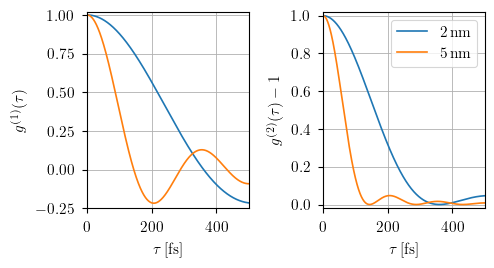

In [3]:
fig,ax = plt.subplots(ncols=2, figsize=(5,2.81))
t = np.linspace(0,5e-13,2000)
# Convert wavelenght window to frequency window
def del_lam_to_del_f(del_lam):
    return 3e8/(465e-9-del_lam/2) - 3e8/(465e-9+del_lam/2)
ax[0].plot(t*1e15, np.sinc(t*del_lam_to_del_f(2e-9)), label='2$\,$nm')
ax[0].plot(t*1e15, np.sinc(t*del_lam_to_del_f(5e-9)), label='5$\,$nm')
ax[0].grid()
ax[0].set(xlabel='$\\tau\,[\mathrm{fs}]$', ylabel='$g^{(1)}(\\tau)$',xlim=(0,500), ylim=(-0.25,1.02))
ax[1].plot(t*1e15, np.sinc(t*del_lam_to_del_f(2e-9))**2, label='2$\,$nm')
ax[1].plot(t*1e15, np.sinc(t*del_lam_to_del_f(5e-9))**2, label='5$\,$nm')
ax[1].grid()
ax[1].legend()
ax[1].set(xlabel='$\\tau\,[\mathrm{fs}]$', ylabel='$g^{(2)}(\\tau) -1$',xlim=(0,500), ylim=(-0.02,1.02))
fig.tight_layout()
fig.savefig('latex/images/Theorie/g1_g2_tau.pdf', bbox_inches='tight')